Saving D3.csv to D3.csv

[α sweep for x1]
alpha=0.1     final J=0.984993  theta=[5.927949, -2.038337]
alpha=0.05    final J=0.984993  theta=[5.927864, -2.038304]
alpha=0.02    final J=0.985596  theta=[5.859208, -2.011583]
alpha=0.01    final J=1.036436  theta=[5.292947, -1.791191]


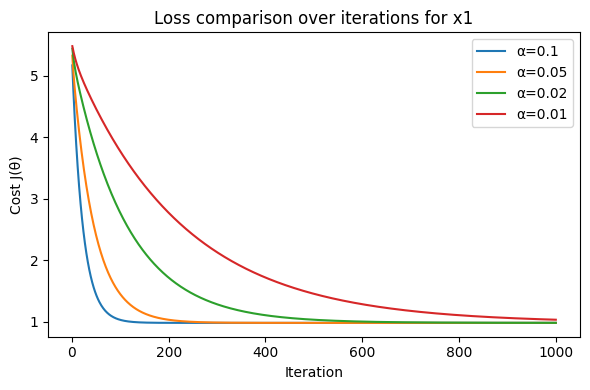


=== Using x1 ===
Best α: 0.1
Linear model:  Y ≈ 5.927949 + -2.038337·x1
Final cost J:  0.984993


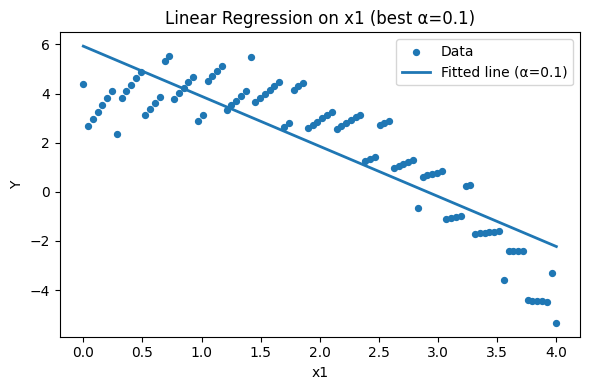


[α sweep for x2]
alpha=0.1     final J=3.599366  theta=[0.736060, 0.557608]
alpha=0.05    final J=3.599366  theta=[0.736054, 0.557610]
alpha=0.02    final J=3.599370  theta=[0.730751, 0.559674]
alpha=0.01    final J=3.599673  theta=[0.687020, 0.576695]


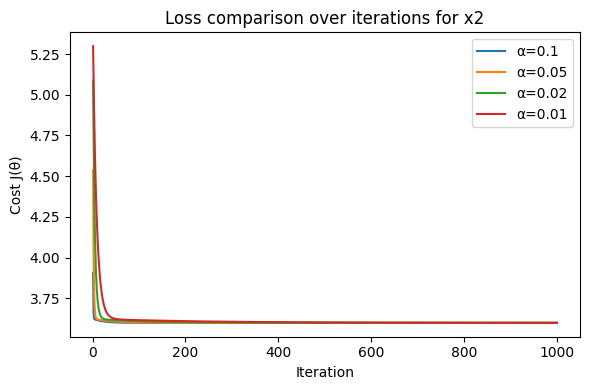


=== Using x2 ===
Best α: 0.1
Linear model:  Y ≈ 0.736060 + 0.557608·x2
Final cost J:  3.599366


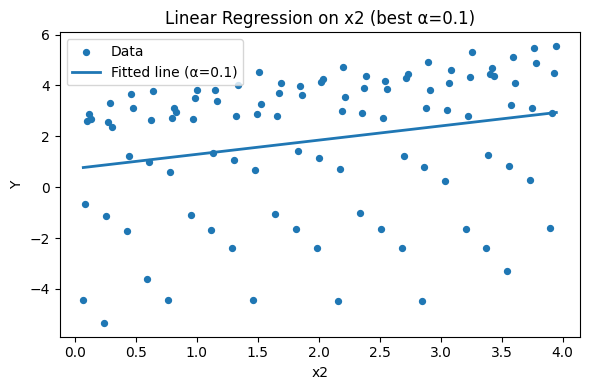


[α sweep for x3]
alpha=0.1     final J=3.629451  theta=[2.871422, -0.520483]
alpha=0.05    final J=3.629451  theta=[2.871389, -0.520470]
alpha=0.02    final J=3.629563  theta=[2.842060, -0.508870]
alpha=0.01    final J=3.639660  theta=[2.591187, -0.409651]


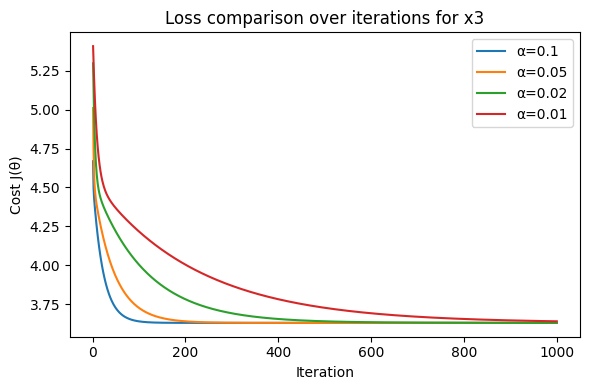


=== Using x3 ===
Best α: 0.1
Linear model:  Y ≈ 2.871422 + -0.520483·x3
Final cost J:  3.629451


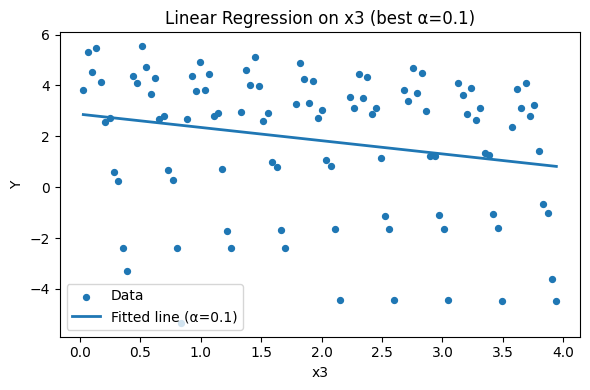


Summary:
x1: α=0.1, final J=0.984993, θ=[ 5.92794892 -2.03833663]
x2: α=0.1, final J=3.599366, θ=[0.73606043 0.55760761]
x3: α=0.1, final J=3.629451, θ=[ 2.8714221  -0.52048288]


In [ ]:
# --- Setup ---
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()
data = pd.read_csv("D3.csv")

# --- Split columns ---
x1 = data.iloc[:, 0].to_numpy(dtype=float)
x2 = data.iloc[:, 1].to_numpy(dtype=float)
x3 = data.iloc[:, 2].to_numpy(dtype=float)
y  = data.iloc[:, 3].to_numpy(dtype=float)

def design_matrix_1d(x):
    x = x.astype(float)
    return np.c_[np.ones_like(x), x]  # shape (m,2): [1, x]

def compute_cost(X, y, theta):
    m = len(y)
    errors = X.dot(theta) - y
    return (1.0 / (2*m)) * np.dot(errors, errors)

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    J_hist = np.zeros(iterations)
    for i in range(iterations):
        predictions  = X.dot(theta)
        errors = predictions - y
        theta -= (alpha / m) * (X.T.dot(errors))
        J_hist[i] = compute_cost(X, y, theta)
    return theta, J_hist

alphas     = [0.1, 0.05, 0.02, 0.01]
iterations = 1000
features   = {"x1": x1, "x2": x2, "x3": x3}

results = []

# --- Train each feature separately
for name, x in features.items():
    X = design_matrix_1d(x)
    best = None
    per_alpha = []  # (alpha, final_cost, theta, J_hist)

    for a in alphas:
        theta0 = np.zeros(X.shape[1])  # [0, 0]
        theta, J_hist = gradient_descent(X, y, theta0, a, iterations)
        final_cost = J_hist[-1] # cost after the last iteration

        per_alpha.append((a, final_cost, theta, J_hist))
        if best is None or final_cost < best["final_cost"]:
            best = {"theta": theta, "alpha": a, "J_hist": J_hist, "final_cost": final_cost}

    # ---- A) Per-α table ----
    print(f"\n[α sweep for {name}]")
    for a, Jf, th, _ in per_alpha:
        print(f"alpha={a:<6}  final J={Jf:.6f}  theta=[{th[0]:.6f}, {th[1]:.6f}]")

    # ---- B) Overlay loss curves for all α ----
    plt.figure(figsize=(6,4))
    for a, Jf, th, J_hist in per_alpha:
        plt.plot(np.arange(1, len(J_hist)+1), J_hist, label=f"α={a}")
    plt.title(f"Loss comparison over iterations for {name}")
    plt.xlabel("Iteration"); plt.ylabel("Cost J(θ)")
    plt.legend(); plt.tight_layout();
    plt.savefig(f"{name}_loss_curves.png", dpi=300, bbox_inches="tight")
    plt.show()

    # ---- Use best α to report & plot fit ----
    theta, a, J_hist = best["theta"], best["alpha"], best["J_hist"]
    results.append({"name": name, "theta": theta, "alpha": a, "final_cost": best["final_cost"]})

    print(f"\n=== Using {name} ===")
    print(f"Best α: {a}")
    print(f"Linear model:  Y ≈ {theta[0]:.6f} + {theta[1]:.6f}·{name}")
    print(f"Final cost J:  {best['final_cost']:.6f}")

    # Plot: data + fitted line for best α
    plt.figure(figsize=(6,4))
    plt.scatter(x, y, s=18, label="Data")
    xs = np.linspace(np.min(x), np.max(x), 200)
    Xs = design_matrix_1d(xs)
    plt.plot(xs, Xs.dot(theta), lw=2, label=f"Fitted line (α={a})")
    plt.title(f"Linear Regression on {name} (best α={a})")
    plt.xlabel(name); plt.ylabel("Y"); plt.legend(); plt.tight_layout();
    plt.savefig(f"{name}_fit_best_alpha_{a}.png", dpi=300, bbox_inches="tight")
    plt.show()

# --- Summary across features ---
print("\nSummary:")
for r in results:
    print(f"{r['name']}: α={r['alpha']}, final J={r['final_cost']:.6f}, θ={r['theta']}")